In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [2]:
p_s = pd.read_excel("power_80p_0821.xlsx", sheet_name='stick').iloc[:, :18]
p_2030nl = pd.read_excel("power_80p_0821.xlsx", sheet_name='crt2030_nl').iloc[:, :18]
p_2030l = pd.read_excel("power_80p_0821.xlsx", sheet_name='crt2030_l').iloc[:, :18]
p_2040nl = pd.read_excel("power_80p_0821.xlsx", sheet_name='crt2040_nl').iloc[:, :18]
p_2040l = pd.read_excel("power_80p_0821.xlsx", sheet_name='crt2040_l').iloc[:, :18]

E:\Anacoda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
E:\Anacoda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
Gen = p_s

In [4]:
def power(Gen):
    Gen_tech=Gen["tech"]
    current_new_tech=[]
    for i in range(len(Gen_tech)):
        tech = Gen_tech.iloc[i]
        if "CCS" in tech:
            if "biomass" in tech:
                current_new_tech.append("biomass w/ CCS")
            elif "coal" in tech:
                current_new_tech.append("coal w/ CCS")
            elif "gas" in tech:
                current_new_tech.append("gas w/ CCS")
            elif "liquids" in tech:
                current_new_tech.append("refined liquids w/ CCS")
            else:
                print("not included_CCS", tech)

        elif "biomass" in tech:
            current_new_tech.append("biomass w/o CCS")
        elif "coal" in tech:
            current_new_tech.append("coal w/o CCS")
        elif "gas" in tech:
            current_new_tech.append("gas w/o CCS")
        elif "liquids" in tech:
            current_new_tech.append("refined liquids w/o CCS")
        elif "PV" in tech:
            current_new_tech.append("solar")
        elif "rooftop" in tech:
            current_new_tech.append("solar")
        elif "CSP" in tech:
            current_new_tech.append("solar")
        elif "wind" in tech:
            current_new_tech.append("wind")

        else:
            current_new_tech.append("others")#here it's nuclear, geothermal, and hydro
    #         print("not included_noCCS", tech)

    #         Gen_tech.extend(current_new_tech)  # Extend the new_tech list with the current_new_tech list

    Gen['broad_tech'] = current_new_tech


    Gen.set_index('broad_tech', inplace=True)

    Gen_plot=Gen[['i2015','i2020','i2025','i2030','i2035','i2040','i2045','i2050']]
    GEN =Gen_plot.groupby('broad_tech').sum()
    GEN = GEN.loc[desired_order]
    Gen_tp = GEN.transpose()
    return(Gen_tp)



In [5]:

GEN_HL = ["#a0237c","#d01c2a","#25a9e0",# 3 undabated fossil
          "#9C7CB0","#FFE900",#wind and solar
          "#507fab",#others
         "#AFE1AF",  #"#E5A84B",#bio-noCCS
           "#CE8892",
                            "#5DA39D",
#            "#ad440c","#00931d",
        "#dab4c7","#008000",
          #"#84e7f9",  "#88c892"
                           ]

GEN_HL = ListedColormap(GEN_HL)



In [10]:

desired_order = ['coal w/o CCS','refined liquids w/o CCS','gas w/o CCS',
                 'wind','solar','others','biomass w/o CCS',
                 'coal w/ CCS','refined liquids w/ CCS','gas w/ CCS','biomass w/ CCS']


plts=power(p_s)

plt2030nl=power(p_2030nl)
plt2030l=power(p_2030l)
plt2040nl=power(p_2040nl)
plt2040l=power(p_2040l)

years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
plts.index = years
plt2030nl.index = years
plt2030l.index = years
plt2040nl.index = years
plt2040l.index = years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


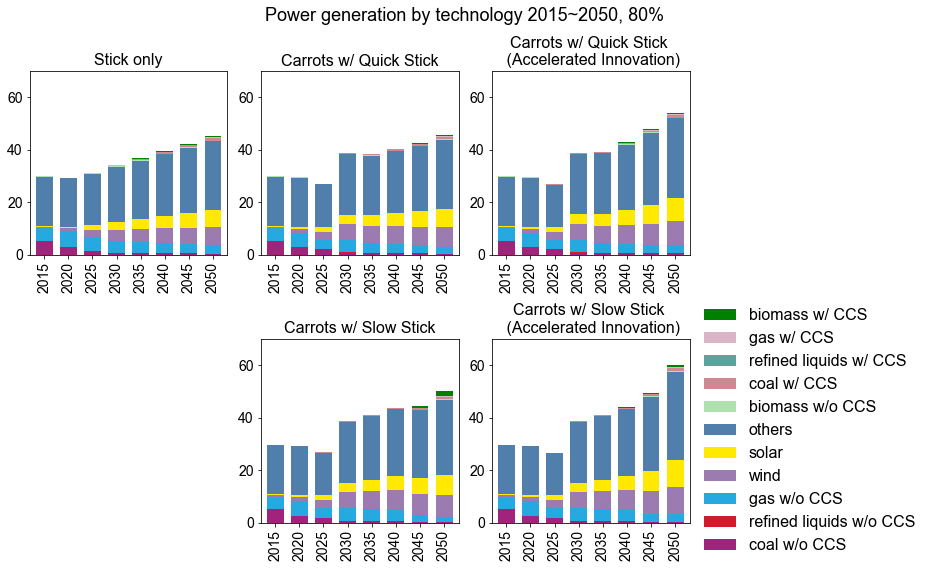

In [11]:

mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 3, figsize=(13, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

plt.suptitle("Power generation by technology 2015~2050, 80%", fontsize=18)


axs[1, 0].axis('off')


plts.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=GEN_HL, width=0.7)
plt2030nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=GEN_HL, width=0.7)
plt2030l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=GEN_HL, width=0.7)
plt2040nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=GEN_HL, width=0.7)
plt2040l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=GEN_HL, width=0.7)


for ax in axs.flat:
    ax.legend().remove()
    ax.set_ylim(0, 70)
    ax.tick_params(axis='both', which='major', labelsize=14)


axs[0, 0].set_title('Stick only', fontsize=16)
# axs[0, 0].set_ylabel('EJ', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
# Add a global legend with reversed order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)


plt.tight_layout()

plt.show()
